Score:  0.7466666666666667
Confusion Matrix:
[[30  9]
 [10 26]]
Classification Report:
              precision    recall  f1-score   support

  Not Stroke       0.75      0.77      0.76        39
      Stroke       0.74      0.72      0.73        36

    accuracy                           0.75        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.75      0.75      0.75        75

------------------------------
Score:  0.8266666666666667
Confusion Matrix:
[[36  3]
 [10 26]]
Classification Report:
              precision    recall  f1-score   support

  Not Stroke       0.78      0.92      0.85        39
      Stroke       0.90      0.72      0.80        36

    accuracy                           0.83        75
   macro avg       0.84      0.82      0.82        75
weighted avg       0.84      0.83      0.82        75

------------------------------
Score:  0.8
Confusion Matrix:
[[35  4]
 [11 25]]
Classification Report:
              precision    recall  f1-

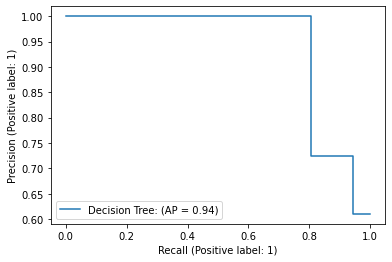

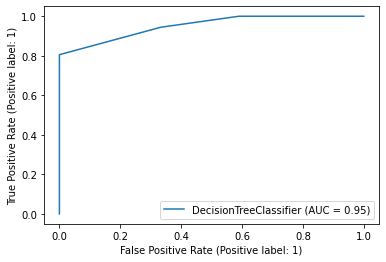

After applying PCA, score is:  0.7321428571428571


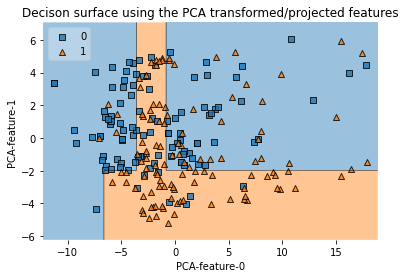

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions
from sklearn import decomposition
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_excel('data.xlsx')

# perform ordinal encoding for ordinal features
enc = preprocessing.OrdinalEncoder(dtype=int)
enc.fit(df[["Age", "What is your normal blood pressure?", "What is work intensity?", "How many hours do you work on average?",
           "Do you feel starved for company?"]])
df[["Age", "What is your normal blood pressure?", "What is work intensity?", "How many hours do you work on average?",
           "Do you feel starved for company?"]] = enc.transform(df[["Age", "What is your normal blood pressure?",
                                                                    "What is work intensity?",
                                                                    "How many hours do you work on average?",
                                                                    "Do you feel starved for company?"]])

# print(enc.categories_)

data = df.to_numpy()

# splitting labels
target = data[:, 18]
# removing timestamps column
data = data[:, 1:18]

# performing binarization of target
target[target == 'Yes'] = 1
target[target == 'No'] = 0

# performing binarization on data
temp = data[:, 0]
temp[temp == "Male"] = 1
temp[temp == "Female"] = 0

temp = data[:, 5:12]
temp[temp == "Yes"] = 1
temp[temp == "No"] = 0

temp = data[:, 16]
temp[temp == "Yes"] = 1
temp[temp == "No"] = 0

# calculate BMI from height and weight
data[:, 2] = data[:, 2] / 3.281
data[:, 2] = np.square(data[:, 2])
data[:, 2] = data[:, 3] / data[:, 2]
data = np.delete(data, 3, 1)

# print(data[:10, :])
# print(target)


x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=42)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

# criterion:gini, splitter:best, max_depth:none, max_features:none
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf.predict(x_test)
print('Score: ', clf.score(x_test, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, clf.predict(x_test)))
print('Classification Report:')
print(classification_report(y_test, clf.predict(x_test), target_names=['Not Stroke', 'Stroke']))
print("------------------------------")

# criterion:entropy, splitter:best, max_depth:3, max_features:none
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(x_train, y_train)
clf.predict(x_test)
print('Score: ', clf.score(x_test, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, clf.predict(x_test)))
print('Classification Report:')
print(classification_report(y_test, clf.predict(x_test), target_names=['Not Stroke', 'Stroke']))
print("------------------------------")

# criterion:entropy, splitter:random, max_depth:3, max_features:none
clf = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=3)
clf.fit(x_train, y_train)
clf.predict(x_test)
print('Score: ', clf.score(x_test, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, clf.predict(x_test)))
print('Classification Report:')
print(classification_report(y_test, clf.predict(x_test), target_names=['Not Stroke', 'Stroke']))
print("------------------------------")

# applying 5-fold stratified cross validation with default model
clf = DecisionTreeClassifier(max_depth=4)
target = target.astype('int')
print("Mean Accuracy: ", cross_val_score(clf, data, target, cv=5).mean())
print(cross_validate(clf, data, target, cv=5, return_train_score=True))
print("------------------------------")

# plot the precision recall curve
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(x_train, y_train)
clf.fit(x_test, y_test)
plot_precision_recall_curve(clf, x_test, y_test, name='Decision Tree:')
plt.show()

# yhat = clf.predict(x_test)
# lr_f1, lr_auc = f1_score(y_test, yhat), auc(recall, precision)
# print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the roc curve
plot_roc_curve(clf, x_test, y_test)
plt.show()


# dimensionality reduction for displaying the decision boundary
pca = decomposition.PCA(n_components=2)
pca.fit(x_train)
X = pca.transform(x_train)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X, y_train)
print('After applying PCA, score is: ', clf.score(X, y_train))

plot_decision_regions(X, y_train, clf=clf, legend=2)

# Adding axes annotations
plt.xlabel('PCA-feature-0')
plt.ylabel('PCA-feature-1')
plt.title('Decison surface using the PCA transformed/projected features')
plt.show()
